# Lending Club Case Study

##### Lending-club-case-study:
Case study to identify risky loan applicants and understand factors that contribute to a loan default.

##### Objective of Case Study:
Objective is to identify predictors of default so that at the time of loan applicaton,
we can use those variables for approval/rejection of the loan.

In [1]:
#Import necessary py libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Read the private data set load.csv

In [2]:
# Read the private data set load.csv file
loan_info = pd.read_csv("loan.csv" ,error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
loan_info

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN


In [5]:
#Dinemsion of loan info
loan_info.shape

(39717, 111)

In [6]:
# Data Set info
loan_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


In [7]:
#Count the number of missing values in each column of the dataset
loan_info.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [8]:
# Count the duplicates id in the dataset
#loan_info.duplicated(subset=None, keep='first').count()
#dup_id_count = loan_info[loan_info.duplicated(['id'])]
#print("Duplicate id count =", dup_id_count)

In [9]:
#dup_mid_count = loan_info[loan_info.duplicated(['member_id'])]
#print("Duplicate Member id count =", dup_mid_count)

# Data Cleaning
- fix rows and columns
- fix missing values
- standardise values
- fix invalid values
- filter data

In [10]:
# Remove the columns having null values 
loan_info.dropna(axis = 1, how = 'all', inplace = True)
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0,1,INDIVIDUAL,0,0,0,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0,1,INDIVIDUAL,0,0,0,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0,1,INDIVIDUAL,0,0,0,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0,1,INDIVIDUAL,0,0,0,0,0


In [11]:
# Need to remove the columns which are single valued
loan_info.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_info.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,863.16,0,0,0,Jan-15,171.62,NaN,May-16,0,0
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,435.17,0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0,0
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,605.67,0,0,0,Jun-14,649.91,NaN,May-16,0,0
3,1076863,1277178,10000,10000,10000,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0,0,Jan-15,357.48,NaN,Apr-16,0,0
4,1075358,1311748,3000,3000,3000,60 months,12.69%,67.79,B,B5,...,1037.39,0,0,0,May-16,67.79,Jun-16,May-16,0,0


In [12]:
# Describe only Numerical data
loan_info.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths,pub_rec_bankruptcies
count,39717,39717,39717,39717,39717,39717,39717,39717,39717,39717,...,39717,39717,39717,39717,39646,39717,1140,39715,39661,39020
unique,39717,39717,885,1041,8205,2,371,15383,7,35,...,35148,1356,4040,2616,101,34930,2,106,1,3
top,1077501,1296599,10000,10000,5000,36 months,10.99%,311.11,B,B3,...,0,0,0,0,May-16,0,Jun-16,May-16,0,0
freq,1,1,2833,2741,1309,29096,956,68,12020,2917,...,71,37671,35499,35935,1256,74,1125,10308,39661,37339


In [13]:
# Data shape after dropping columns which had nothing 
loan_info.shape

(39717, 49)

In [14]:
# Removing irrelevant columns which are not affecting the loan defualting criteria
loan_info.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loan_info

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,Charged Off,car,1,Apr-99,5,3,0,9.40%,4,0
2,2400,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10,0
3,10000,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,Fully Paid,other,20,Feb-96,1,10,0,21%,37,0
4,3000,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,Current,other,17.94,Jan-96,0,15,0,53.90%,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,...,Fully Paid,home_improvement,11.33,Nov-90,0,13,0,13.10%,40,NaN
39713,8500,8500,875,36 months,10.28%,275.38,C,C1,3 years,RENT,...,Fully Paid,credit_card,6.4,Dec-86,1,6,0,26.90%,9,NaN
39714,5000,5000,1325,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,...,Fully Paid,debt_consolidation,2.3,Oct-98,0,11,0,19.40%,20,NaN
39715,5000,5000,650,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,...,Fully Paid,other,3.72,Nov-88,0,17,0,0.70%,26,NaN


In [15]:
loan_info.shape

(39717, 23)

In [16]:
loan_info.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc', 'pub_rec_bankruptcies'],
      dtype='object')

In [17]:
# To further analyse the defaulter "fully paid" or "charged off loans" can be explored
loan_info = loan_info[loan_info.loan_status != "Current"]
loan_info.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [18]:
# Check for Missing values
(loan_info.isna().sum()/len(loan_info.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_util              0.129611
total_acc               0.000000
pub_rec_bankruptcies    1.806776
dtype: float64

##### Fixing Missing values

In [19]:
# Fixing Missing values, 
# variable emp_length and revol_util has values missing
# Check for data and types in other columns

In [20]:
loan_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   loan_amnt             38577 non-null  object
 1   funded_amnt           38577 non-null  object
 2   funded_amnt_inv       38577 non-null  object
 3   term                  38577 non-null  object
 4   int_rate              38577 non-null  object
 5   installment           38577 non-null  object
 6   grade                 38577 non-null  object
 7   sub_grade             38577 non-null  object
 8   emp_length            37544 non-null  object
 9   home_ownership        38577 non-null  object
 10  annual_inc            38577 non-null  object
 11  verification_status   38577 non-null  object
 12  issue_d               38577 non-null  object
 13  loan_status           38577 non-null  object
 14  purpose               38577 non-null  object
 15  dti                   38577 non-null

In [21]:
# Calculate Mode in order to check the occurence of number of years employee duration in the company

print("Mode : " + loan_info.emp_length.mode()[0])
loan_info.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [22]:
# mode value has far higher frequency than that of the next most frequent value, 
# Missing values can be assigned with mode that doesn't affact the overall analysis of Employee lenght in the company

loan_info.emp_length.fillna(loan_info.emp_length.mode()[0], inplace = True)
loan_info.emp_length.isna().sum()

0

In [23]:
loan_info.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_info.revol_util.isna().sum()

0

**Standardizing the data

In [24]:
# Need to standardize some data like revol_util,int_rate, emp_length for further consistent analysis
# revo_util are continuous values but need to remove %.
loan_info.revol_util = pd.to_numeric(loan_info.revol_util.apply(lambda x : x.split('%')[0]))

In [25]:
# need to remove %  from int_rate.
loan_info.int_rate = pd.to_numeric(loan_info.int_rate.apply(lambda x : x.split('%')[0]))

In [26]:
# need to remove logical operators from emp_length.
loan_info.emp_length = pd.to_numeric(loan_info.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [27]:
# need to remove months from loan term.
loan_info.term = pd.to_numeric(loan_info.term.apply(lambda x : x.split('months')[0]))

In [28]:
# convert amount columns into numeric data to find some correlation among important ones.
col_to_num = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','emp_length','annual_inc','dti','inq_last_6mths','open_acc','pub_rec']
loan_info[col_to_num] = loan_info[col_to_num].apply(pd.to_numeric)

In [29]:
#Lets take a look on important variable loan status in total loans issued
(loan_info.loan_status.value_counts()*100)/len(loan_info)

Fully Paid     85.436188
Charged Off    14.563812
Name: loan_status, dtype: float64

In [30]:
loan_info.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9,0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4,0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10,0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37,0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12,0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8,RENT,...,Fully Paid,debt_consolidation,23.51,Jul-05,1,7,0,85.6,11,0
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9,RENT,...,Fully Paid,car,5.35,Jan-07,2,4,0,87.5,4,0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4,OWN,...,Charged Off,small_business,5.55,Apr-04,2,11,0,32.6,13,0
9,5375,5375,5350.0,60,12.69,121.45,B,B5,0,RENT,...,Charged Off,other,18.08,Sep-04,0,2,0,36.5,3,0
10,6500,6500,6500.0,60,14.65,153.45,C,C3,5,OWN,...,Fully Paid,debt_consolidation,16.12,Jan-98,2,14,0,20.6,23,0


##### Derive Columns For Analysis

In [31]:
# Derived columns
# Deriving new columns using existing data that may further used in analysis.
# create month and year columns separately
loan_info.issue_d = pd.to_datetime(loan_info.issue_d, format='%b-%y')
loan_info['year']=loan_info['issue_d'].dt.year
loan_info['month']=loan_info['issue_d'].dt.month

In [32]:
loan_info

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,year,month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,27.65,Jan-85,1,3,0,83.7,9,0,2011,12
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1.00,Apr-99,5,3,0,9.4,4,0,2011,12
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,8.72,Nov-01,2,2,0,98.5,10,0,2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,20.00,Feb-96,1,10,0,21.0,37,0,2011,12
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,11.20,Nov-04,3,9,0,28.3,12,0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,11.33,Nov-90,0,13,0,13.1,40,NaN,2007,7
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,6.40,Dec-86,1,6,0,26.9,9,NaN,2007,7
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,...,2.30,Oct-98,0,11,0,19.4,20,NaN,2007,7
39715,5000,5000,650.0,36,7.43,155.38,A,A2,0,MORTGAGE,...,3.72,Nov-88,0,17,0,0.7,26,NaN,2007,7


##### Univariate Analysis

In [33]:
# Basic statistics with .describe() - loan_amnt
loan_info['loan_amnt'].describe()

count    38527.000000
mean     11055.265139
std       7348.433587
min        500.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

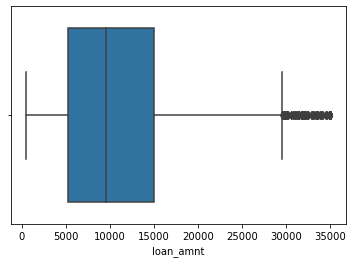

In [34]:
sns.boxplot(loan_info['loan_amnt'] , orient="h")

##### Outlier Removal

In [35]:
# Statistics of annual_inc
loan_info['annual_inc'].describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

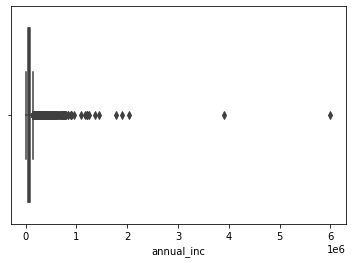

In [36]:
sns.boxplot(loan_info['annual_inc'])

In [37]:
# Above box plot for annual_inc depicts the presence of outliers which needs to be removed
# Let's see the quantile info and take an appropriate action.
# The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
# So, considering threshold for removing outliers as 0.95

In [38]:
# Removing Outliers quantile from Annual Income will make it easier to visualize the plots
quantile_data = loan_info.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_data

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [39]:
per_95_annual_inc = loan_info['annual_inc'].quantile(0.95)
loan_info = loan_info[loan_info.annual_inc <= per_95_annual_inc]
loan_info

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,year,month
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,...,27.65,Jan-85,1,3,0,83.7,9,0,2011,12
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,...,1.00,Apr-99,5,3,0,9.4,4,0,2011,12
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,...,8.72,Nov-01,2,2,0,98.5,10,0,2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,...,20.00,Feb-96,1,10,0,21.0,37,0,2011,12
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,...,11.20,Nov-04,3,9,0,28.3,12,0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39711,5000,5000,700.0,36,8.70,158.30,B,B1,5,MORTGAGE,...,15.55,May-94,0,10,0,23.0,29,NaN,2007,7
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4,MORTGAGE,...,11.33,Nov-90,0,13,0,13.1,40,NaN,2007,7
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3,RENT,...,6.40,Dec-86,1,6,0,26.9,9,NaN,2007,7
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,0,MORTGAGE,...,2.30,Oct-98,0,11,0,19.4,20,NaN,2007,7


<AxesSubplot:xlabel='annual_inc'>

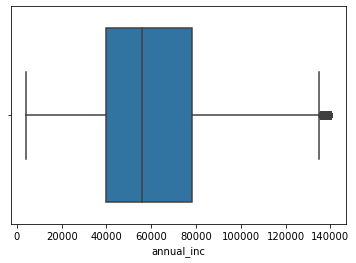

In [40]:
# After Outlier removal , annual_inc data seems to be stable including upper and lower range 
sns.boxplot(loan_info.annual_inc)

In [41]:
# Statistics of emp_length
loan_info['emp_length'].describe()

count    36606.000000
mean         5.044665
std          3.595980
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

<AxesSubplot:xlabel='emp_length'>

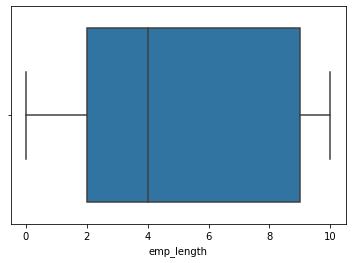

In [42]:
# Average Emp_length is 4 years
# Between 50% to 75% percentile has emp_length of more than 5 years and below 10 years
sns.boxplot(loan_info['emp_length'])

In [43]:
# Statistics of revol_util
loan_info['revol_util'].describe()

count    36606.000000
mean        48.659741
std         28.282836
min          0.000000
25%         25.300000
50%         49.000000
75%         72.100000
max         99.900000
Name: revol_util, dtype: float64

<AxesSubplot:ylabel='revol_util'>

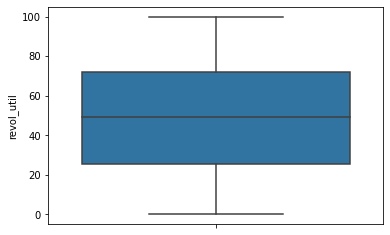

In [44]:
sns.boxplot(y=loan_info['revol_util'])

In [45]:
# Statistics of int_rate
loan_info['int_rate'].describe()

count    36606.000000
mean        11.883216
std          3.666065
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:ylabel='int_rate'>

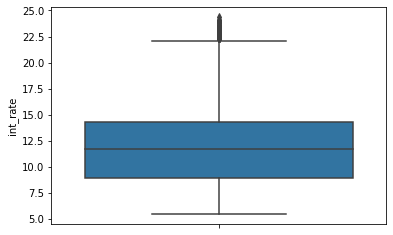

In [46]:
# Average intrest rate is 12 %
# after 75% percentile interest rate increased to 25% from 15%.
sns.boxplot(y=loan_info['int_rate'])

In [47]:
# Statistics of dti
loan_info['dti'].describe()

count    36606.000000
mean        13.450146
std          6.660418
min          0.000000
25%          8.350000
50%         13.580000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

<AxesSubplot:xlabel='dti'>

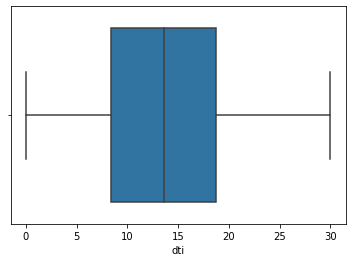

In [48]:
sns.boxplot(loan_info.dti)

In [49]:
# Statistics of funded_amnt_inv
loan_info['funded_amnt_inv'].describe()

count    36606.000000
mean      9902.311039
std       6730.696329
min          0.000000
25%       4988.276705
50%       8396.342174
75%      13649.999283
max      35000.000000
Name: funded_amnt_inv, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

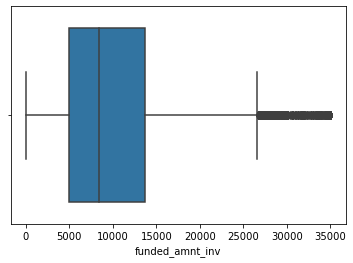

In [50]:
sns.boxplot(loan_info.funded_amnt_inv)

##### Correlation Matrix - Quantitative Variables

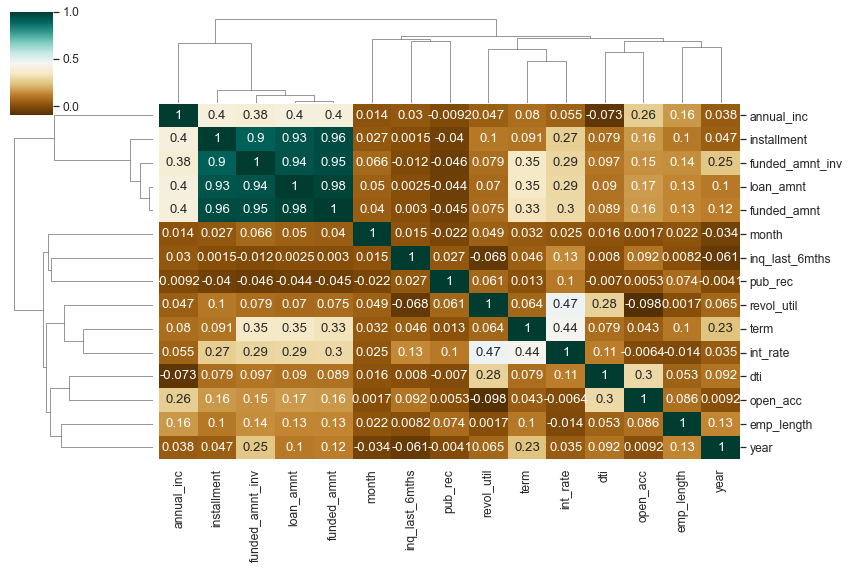

In [51]:
# Bivariate Analysis - Correlation Matrix-Quantitative Variables
# Heatmap with Dendogram(clustermap) to show closeness among numerical variables.

loan_correlation = loan_info.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

# It is observed that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted that means when annual income is low DTI is high & vice-versa
# positive correlation between annual income and employment years,that means income increases with work experience.

##### Univariate Analysis 

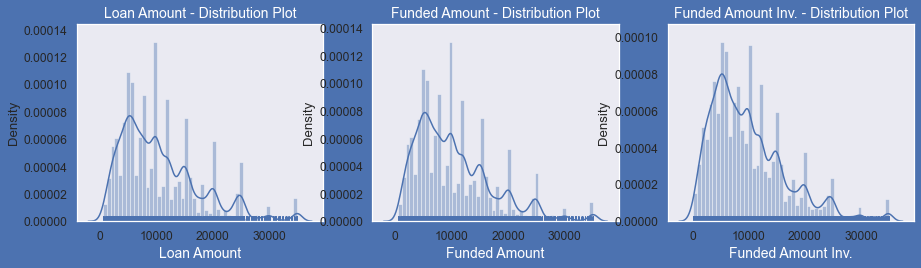

In [52]:
# Distribution of three loan amount fields using distribution plot.
# Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loan_info['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loan_info['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loan_info['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.

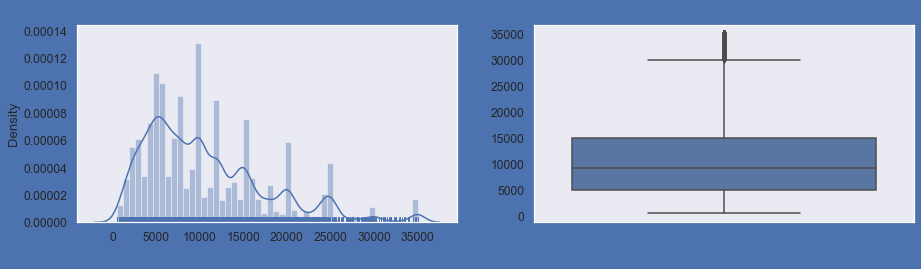

In [53]:
# Univariate Analysis on Loan amount using Distribution and Box plot

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_info['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Loan Amount',fontsize=14,color='b')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_info['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Loan Amount',fontsize=14,color='b')
plt.show()

# Observations :
# Most of the Loan amounts are in range of 5000 - 15000

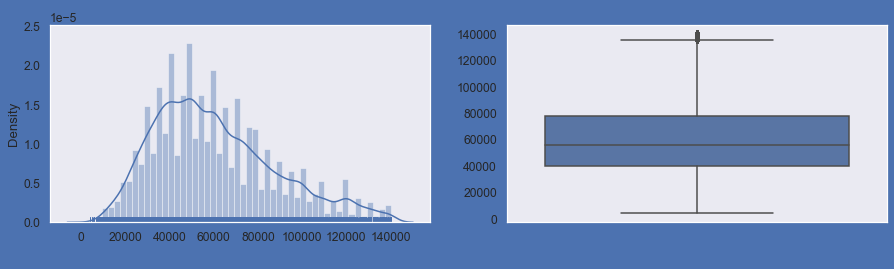

In [54]:
# Univariate Analysis on Annual Income using Distribution and Box plot

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan_info['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='b')
ax.set_xlabel('Annual Income',fontsize=14,color='b')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loan_info['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='b')
ax.set_ylabel('Annual Income',fontsize=14,color='b')
plt.show()

# Observations :
# Majority of the borrower's Annual incomes are in range of 40000- 80000

In [55]:
# Loan Status using count plot
loan_info["loan_status"].describe()

count          36606
unique             2
top       Fully Paid
freq           31204
Name: loan_status, dtype: object

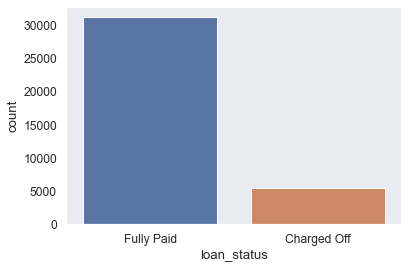

In [56]:
sns.countplot(x= loan_info["loan_status"])
plt.show()

In [57]:
# Majority of loans are fully paid
# About 14% of loan are having status as defaulters(charged off)
loan_info["loan_status"].value_counts()

Fully Paid     31204
Charged Off     5402
Name: loan_status, dtype: int64

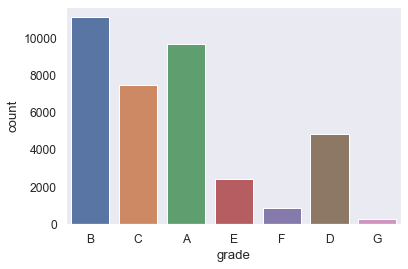

In [58]:
# Majority of the loans have grade of A and B ,so the loans are high graded loans
sns.countplot(x='grade', data=loan_info)
plt.show()

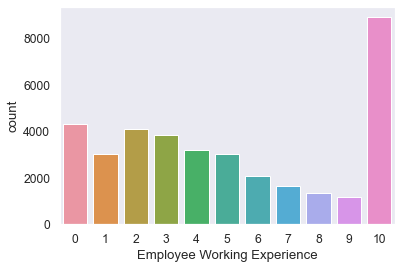

In [59]:
# Most of employees applying for the loan have more than 10 years of experience
sns.countplot(x='emp_length', data=loan_info)
plt.xlabel('Employee Working Experience')
plt.show()

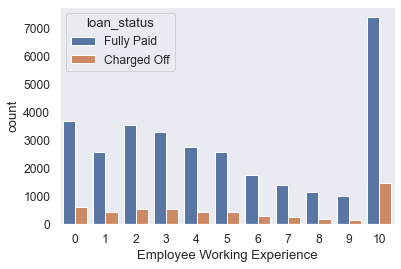

In [60]:
# Loan Status vs Employee working Exp
# employees with more exp has fully paid the loans
sns.countplot(x='emp_length', hue='loan_status', data=loan_info)
plt.xlabel('Employee Working Experience')
plt.show()

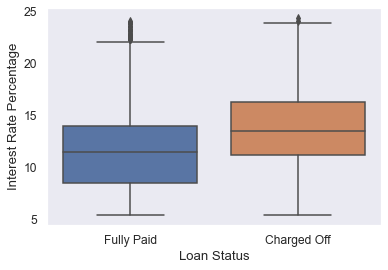

In [61]:
# Interest rate and Loan Status describe as less intrest rates are fully paid compared to high interest
sns.boxplot(y='int_rate', x='loan_status', data=loan_info)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

##### Segmented Univariate Analysis

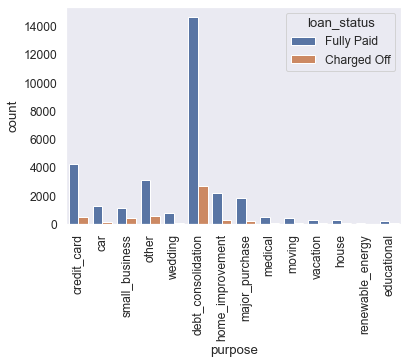

In [62]:
# Majority of loan has been given for the debt consolidation purpose and has been fully paid
sns.countplot(x='purpose', hue="loan_status", data=loan_info)
plt.xticks(rotation=90)
plt.show()

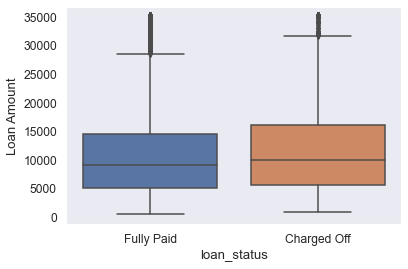

In [63]:
# Loan Amount with respect to Loan status
# Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same
sns.boxplot( y="loan_amnt", x='loan_status' , data=loan_info)
plt.ylabel('Loan Amount')
plt.show()

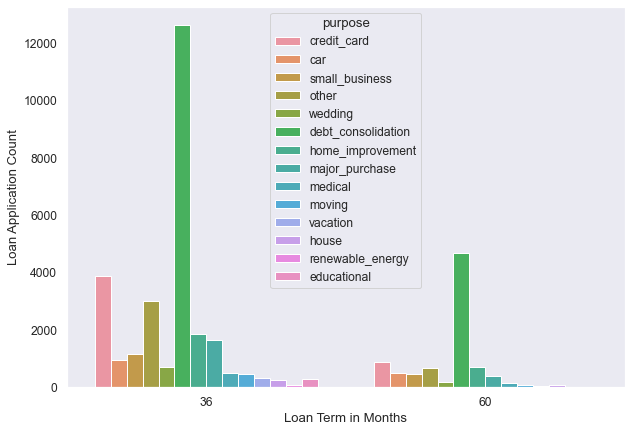

In [64]:
# Loan Tenure factor
# Loan Term of 36 months have have high chances to be defaulters
plt.figure(figsize=(10,7))
sns.countplot( x="term", hue='purpose', data=loan_info)
plt.xlabel('Loan Term in Months')
plt.ylabel('Loan Application Count')
plt.show()

##### Bivariate Analysis

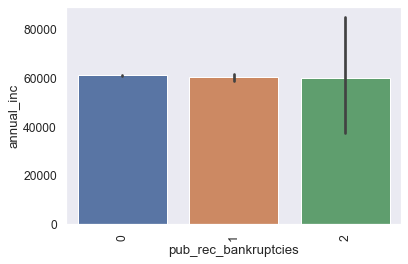

In [65]:
# Annual Increment and Number of public record bankruptcies
sns.barplot(y='annual_inc', x='pub_rec_bankruptcies', data=loan_info)
plt.xticks(rotation=90)
plt.show()

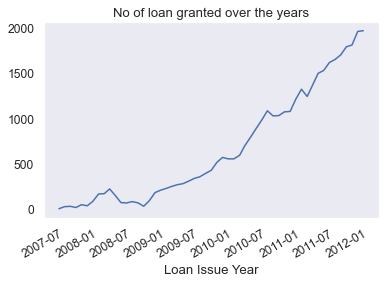

In [66]:
# Loan Applicants have been increasing exponentially from year 2007 to 2011
g = loan_info.groupby('issue_d')['loan_status'].count()

g.plot.line(x_compat=True)
#plt.xticks(np.arange(min(g.index), max(g.index), 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

**Home Ownership Analysis

In [67]:
# checking unique values for home_ownership
loan_info['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [68]:
# NONE seems to be irrelavant for Home_ownership, replacing NONE with OTHER to make it meaningful
loan_info['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [69]:
#checking unique values for home_ownership again to verify no NONE exists
loan_info['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

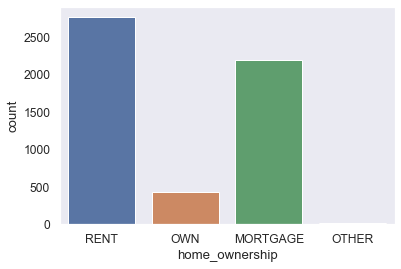

In [70]:
fig, ax = plt.subplots(figsize = (6,4))
sns.countplot(x='home_ownership', data=loan_info[loan_info['loan_status']=='Charged Off'])

Text(0.5, 0, 'Loan Application Count')

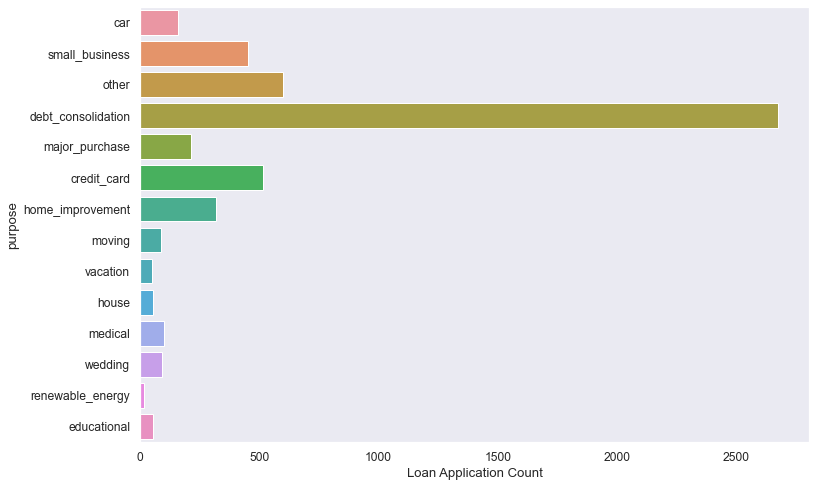

In [71]:
# Majority of the employee apply loas for debt consolidation purpose
fig, ax = plt.subplots(figsize = (12,8))
sns.countplot(y ='purpose', data=loan_info[loan_info.loan_status == 'Charged Off'])
ax.set_xlabel('Loan Application Count')

<AxesSubplot:xlabel='year', ylabel='loan_amnt'>

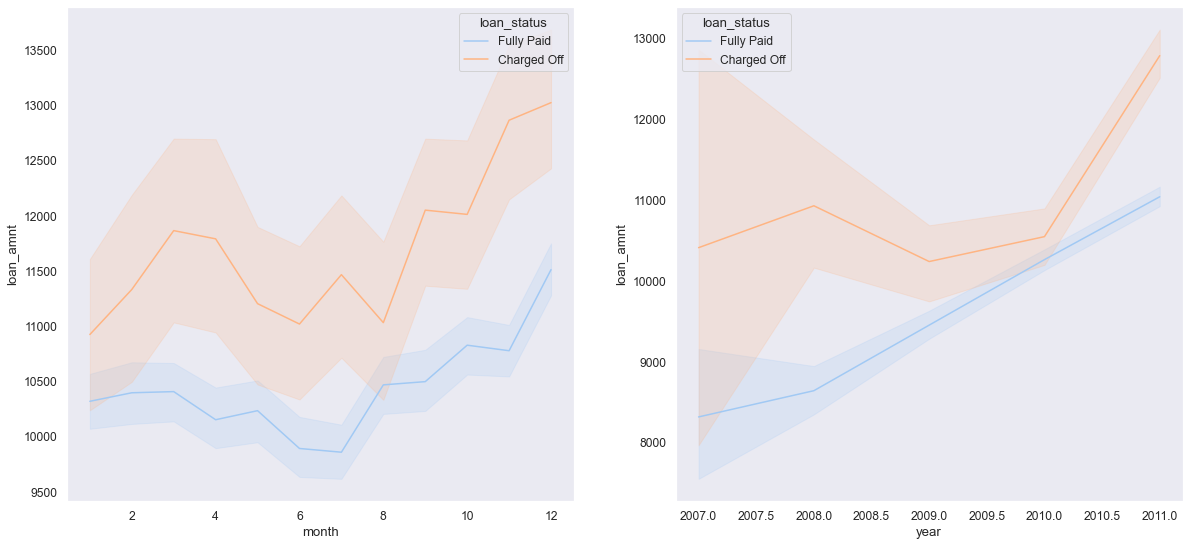

In [72]:
# Loan amount vs Loan Issue year/Month

plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_info,y='loan_amnt', x='month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_info,y='loan_amnt', x='year', hue ='loan_status',palette="pastel")

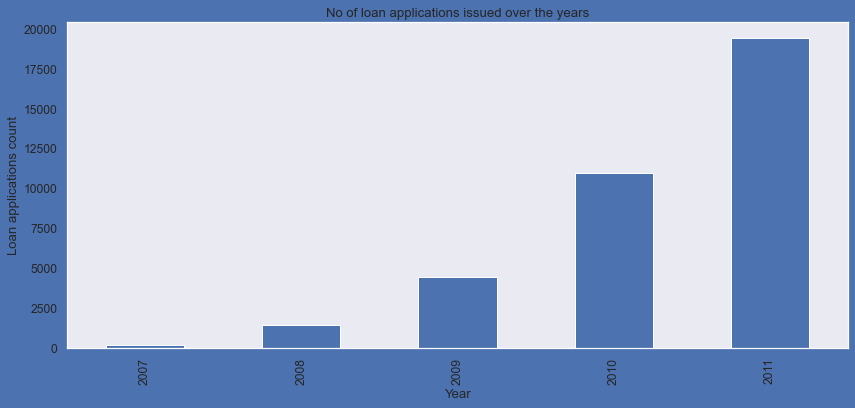

In [73]:
# Derived Column - Ordered Categorical Variables
# Analysis of number of loans approved every year/month
# Use of derived column year to check pattern of loan issuing over the years.

plt.figure(figsize=(14,6),facecolor='b')
g = loan_info.groupby('year')['month'].count()
g.plot.bar()

plt.ylabel('Loan applications count')
plt.xlabel('Year')      
plt.title("No of loan applications issued over the years")
plt.show()


# Observation: loan application is increasing every passing year.
# Increase in number of loan applications are adding more to number of charged off applications.

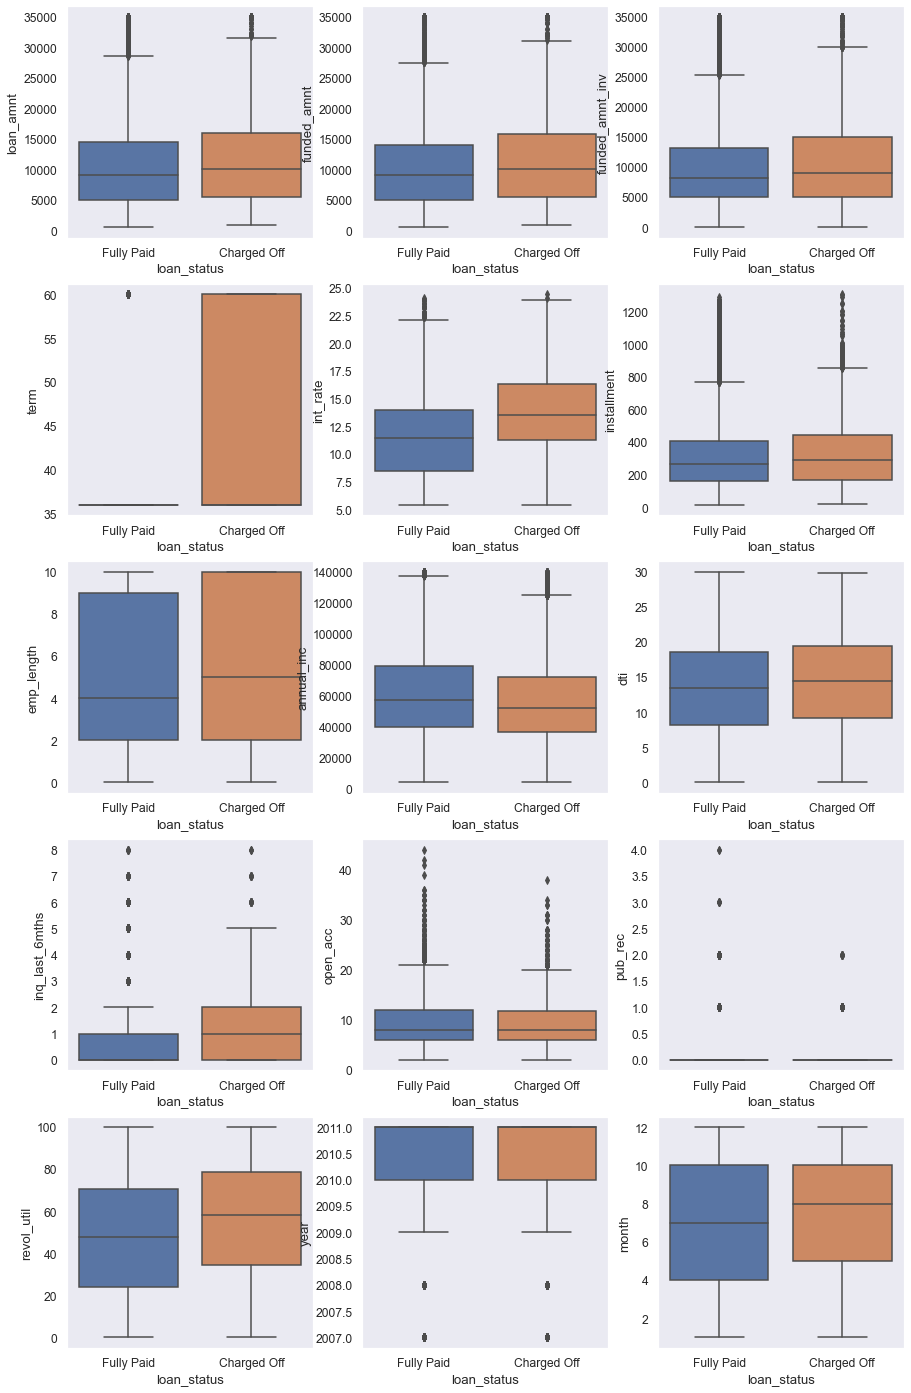

In [74]:
# All the loan related Numerical Data Analysis using box plot
num_data_analysis = ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','emp_length','annual_inc','dti','inq_last_6mths','open_acc','pub_rec','revol_util','year','month']

plt.figure(figsize=(15,40))


for i in range(len(num_data_analysis)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=loan_info[num_data_analysis[i]], x=loan_info['loan_status'])

plt.show()

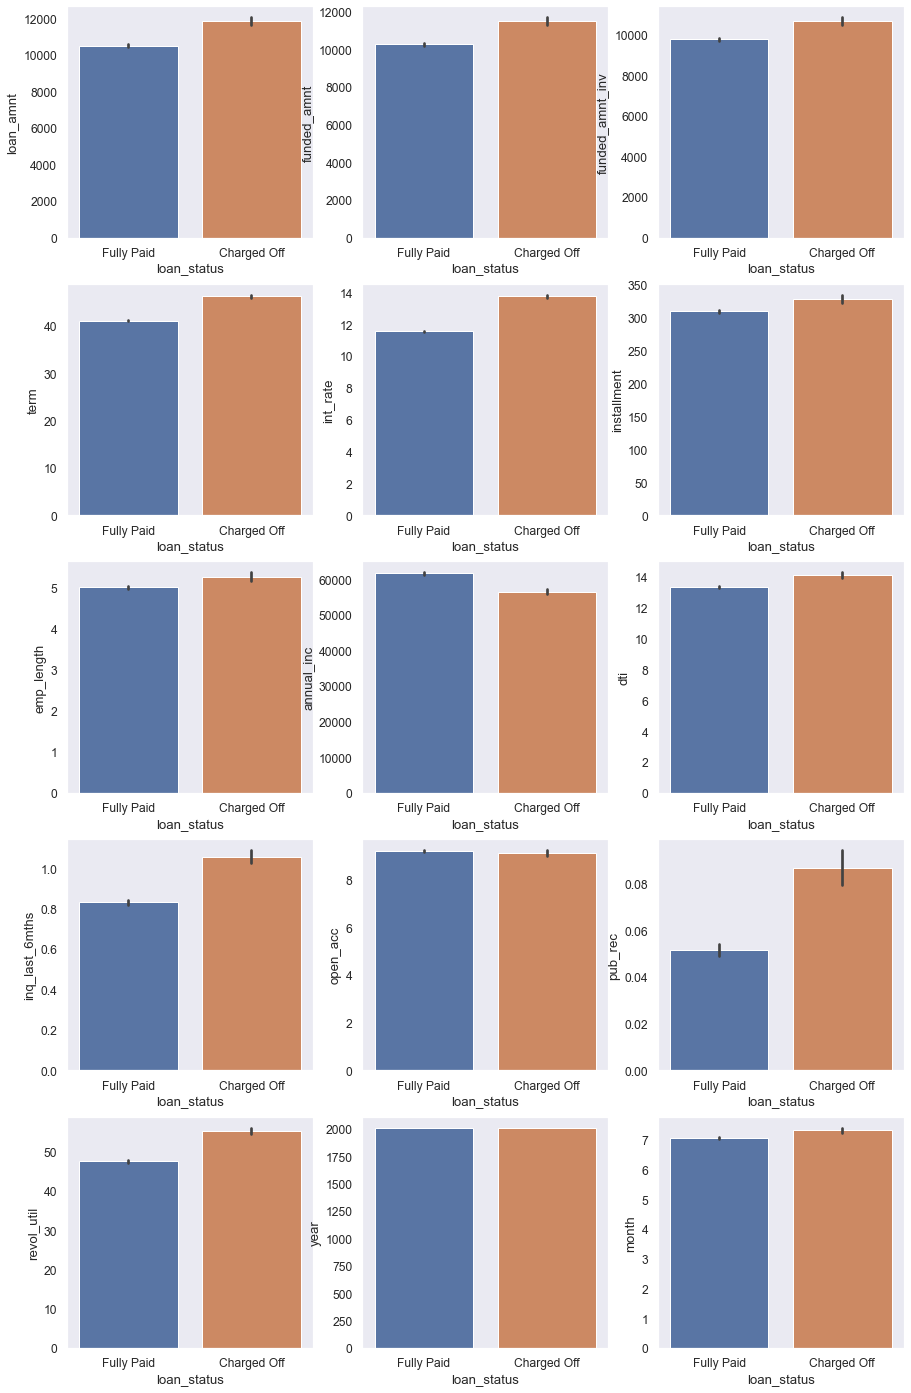

In [75]:
# loan related Numerical Data Analysis using bar plot
plt.figure(figsize=(15,40))

for i in range(len(num_data_analysis)):
    plt.subplot(8,3, i + 1)
    sns.barplot(y=loan_info[num_data_analysis[i]], x=loan_info['loan_status'])

plt.show()

Analysing of annual income with other paratmeters for more understanding

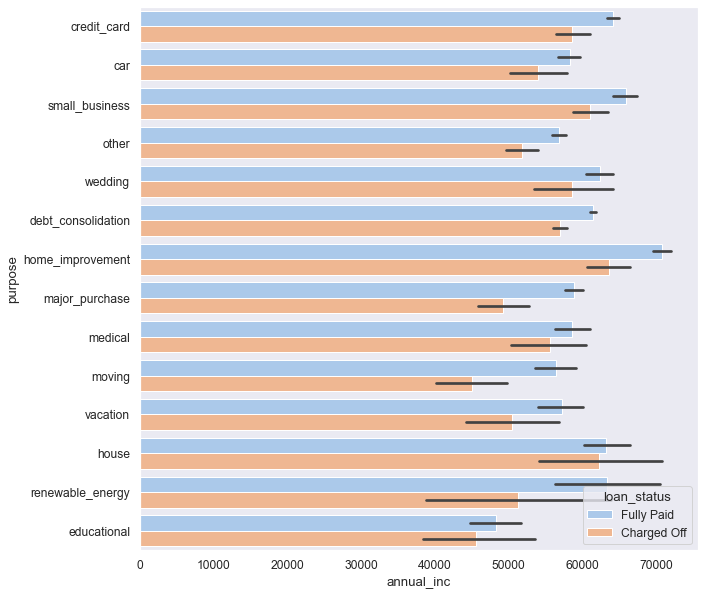

In [76]:
# Annual income vs loan purpose
plt.figure(figsize=(10,10))
sns.barplot(data =loan_info,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

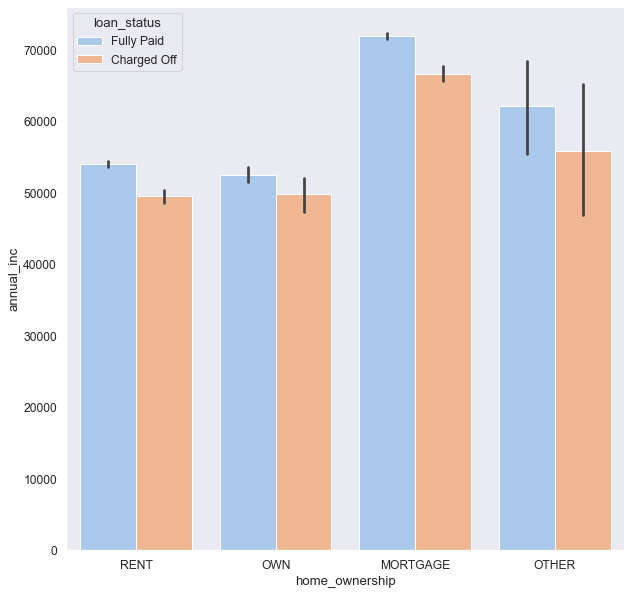

In [77]:
#Annual income vs home ownership
plt.figure(figsize=(10,10))
sns.barplot(data =loan_info,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

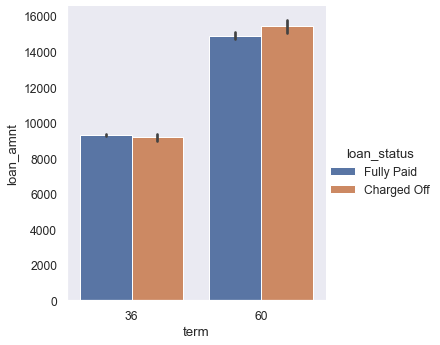

In [78]:
#loan amount vs term
sns.catplot(x = 'term', y = 'loan_amnt', data = loan_info,hue = 'loan_status', kind = 'bar')

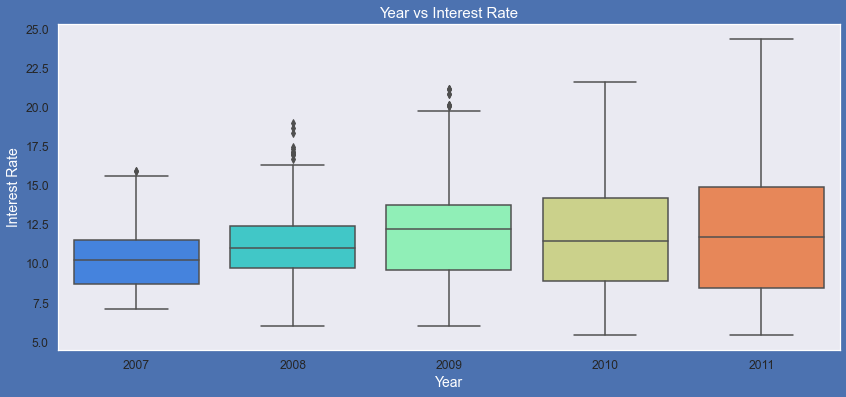

In [79]:
# year vs Interest Rate
# Box Plot

plt.figure(figsize=(14,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='year', data =loan_info,palette='rainbow')
ax.set_title('Year vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Year',fontsize=14,color = 'w')
plt.show()

# Observations:
# Below plot shows intrest rate is increasing slowly with increase in year.

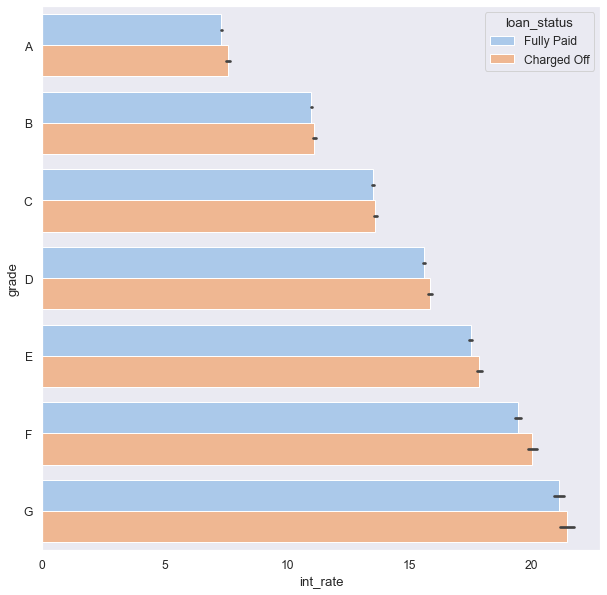

In [80]:
# Employees with longer working history got the loan approved for a higher amount.

plt.figure(figsize=(10,10))
sns.barplot(data =loan_info,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()



<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

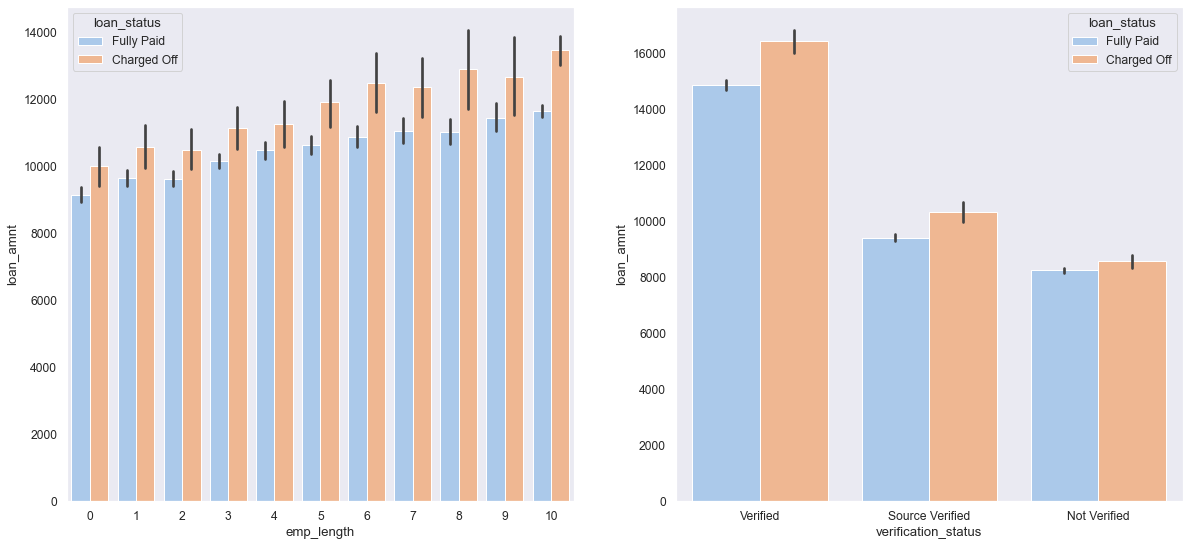

In [81]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_info,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_info,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

##### Conclusion & Observations:
1. Interest rate is increasing with loan amount increase.
2. longer the loan term more the interest rate.
3. Verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the    loans with higher values
4. Most of the loans granted were of 36 months tenure
5. Loans granted for 36 months have comparitively high tendency to default.
6. Debt Consolidation is the most common purpose and most loans are granted for 36 and 60 months.
7. Loan having higher rate of interest have more defaulters.
8. Majority of employees applying for loans have equal to or more than 10 years of experience.
9. Tendancy to default the loan with 10 years experience is also high.
10. Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"
11. The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)
12. Across all the income groups, the loan_amount is higher for people who defaulted.